# Uso de algoritmos de classificação para previsão de desistência de alunos na disciplina de lógica de programação.
- Para o treinamento dos algoritmos, foi utilizado diferentes conjuntos de dados contendo atributos das listas de exercícios, extraídos da plataforma LOP.

In [160]:
# Importa todas as bibliotecas que serão utilizadas

# Bibliotecas essenciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para funções de treinamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Bibliotecas de métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Bibliotecas de Classificadores
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Bibliotecas para Processo de Clusterização
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Conjunto de Dados 1
- Conjunto de dados formado pelos alunos de todas as turmas da disciplina de Lógica de Programação, no ano de 2022.

### Carregando os dados

In [317]:
# Faz o upload do conjunto de dados
dataset = pd.read_csv('ConjuntoDeDados1.csv')

In [318]:
# Descreve o conjunto de dados
dataset.describe()

submissions_list01  QuestionsList_list01  HitsCorrects_list01  \
count          879.000000                 879.0           879.000000   
mean             2.738339                   5.0             2.737201   
std              2.448517                   0.0             2.447232   
min              0.000000                   5.0             0.000000   
25%              0.000000                   5.0             0.000000   
50%              5.000000                   5.0             5.000000   
75%              5.000000                   5.0             5.000000   
max              6.000000                   5.0             5.000000   

       submissions_mean_list01  wrong_list01  partially_wrong_list01  \
count               879.000000    879.000000              879.000000   
mean                 56.370876      0.029579                0.002275   
std                  49.192875      0.211382                0.047673   
min                   0.000000      0.000000                0.000000   
25%                   0.000000      0.000000                0.000000   
50%                 100.000000      0.000000                0.000000   
75%                 100.000000      0.000000                0.000000   
max                 100.000000      3.000000                1.000000   

       Submissions_Corrects_list01  TimeAll_list01  TimeMean_list01  \
count                   879.000000    8.790000e+02     8.790000e+02   
mean                      2.706485    2.461738e+06     5.108218e+05   
std                       2.448158    1.275777e+07     2.556629e+06   
min                       0.000000    0.000000e+00     0.000000e+00   
25%                       0.000000    0.000000e+00     0.000000e+00   
50%                       5.000000    9.293690e+05     2.222770e+05   
75%                       5.000000    2.715489e+06     5.725968e+05   
max                       6.000000    3.614821e+08     7.229642e+07   

       TimeSD_list01  ...  partially_wrong_list03  \
count   8.580000e+02  ...              879.000000   
mean    5.324531e+05  ...                0.012514   
std     3.534768e+06  ...                0.111228   
min     0.000000e+00  ...                0.000000   
25%     0.000000e+00  ...                0.000000   
50%     1.195462e+05  ...                0.000000   
75%     4.387269e+05  ...                0.000000   
max     9.682611e+07  ...                1.000000   

       Submissions_Corrects_list03  TimeAll_list03  TimeMean_list03  \
count                   879.000000    8.790000e+02     8.790000e+02   
mean                      5.339022    5.329778e+06     4.993687e+05   
std                       5.759509    1.442526e+07     1.260211e+06   
min                       0.000000    0.000000e+00     0.000000e+00   
25%                       0.000000    0.000000e+00     0.000000e+00   
50%                       0.000000    5.417100e+04     6.285083e+03   
75%                      12.000000    7.189123e+06     6.625540e+05   
max                      12.000000    2.206111e+08     2.005555e+07   

       TimeSD_list03  Percentage_hit_list03  submitted_list03  \
count   8.620000e+02             879.000000        879.000000   
mean    6.912212e+05              45.345089          0.503982   
std     3.393973e+06              48.299622          0.500269   
min     0.000000e+00               0.000000          0.000000   
25%     0.000000e+00               0.000000          0.000000   
50%     0.000000e+00               8.333333          1.000000   
75%     5.343596e+05             100.000000          1.000000   
max     5.982948e+07             100.000000          1.000000   

       submitted_list13  submitted_list14  submitted_list15  
count        879.000000        879.000000        879.000000  
mean           0.366325          0.345848          0.331058  
std            0.482074          0.475915          0.470862  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.00

### Visualização da Matriz de Correlação

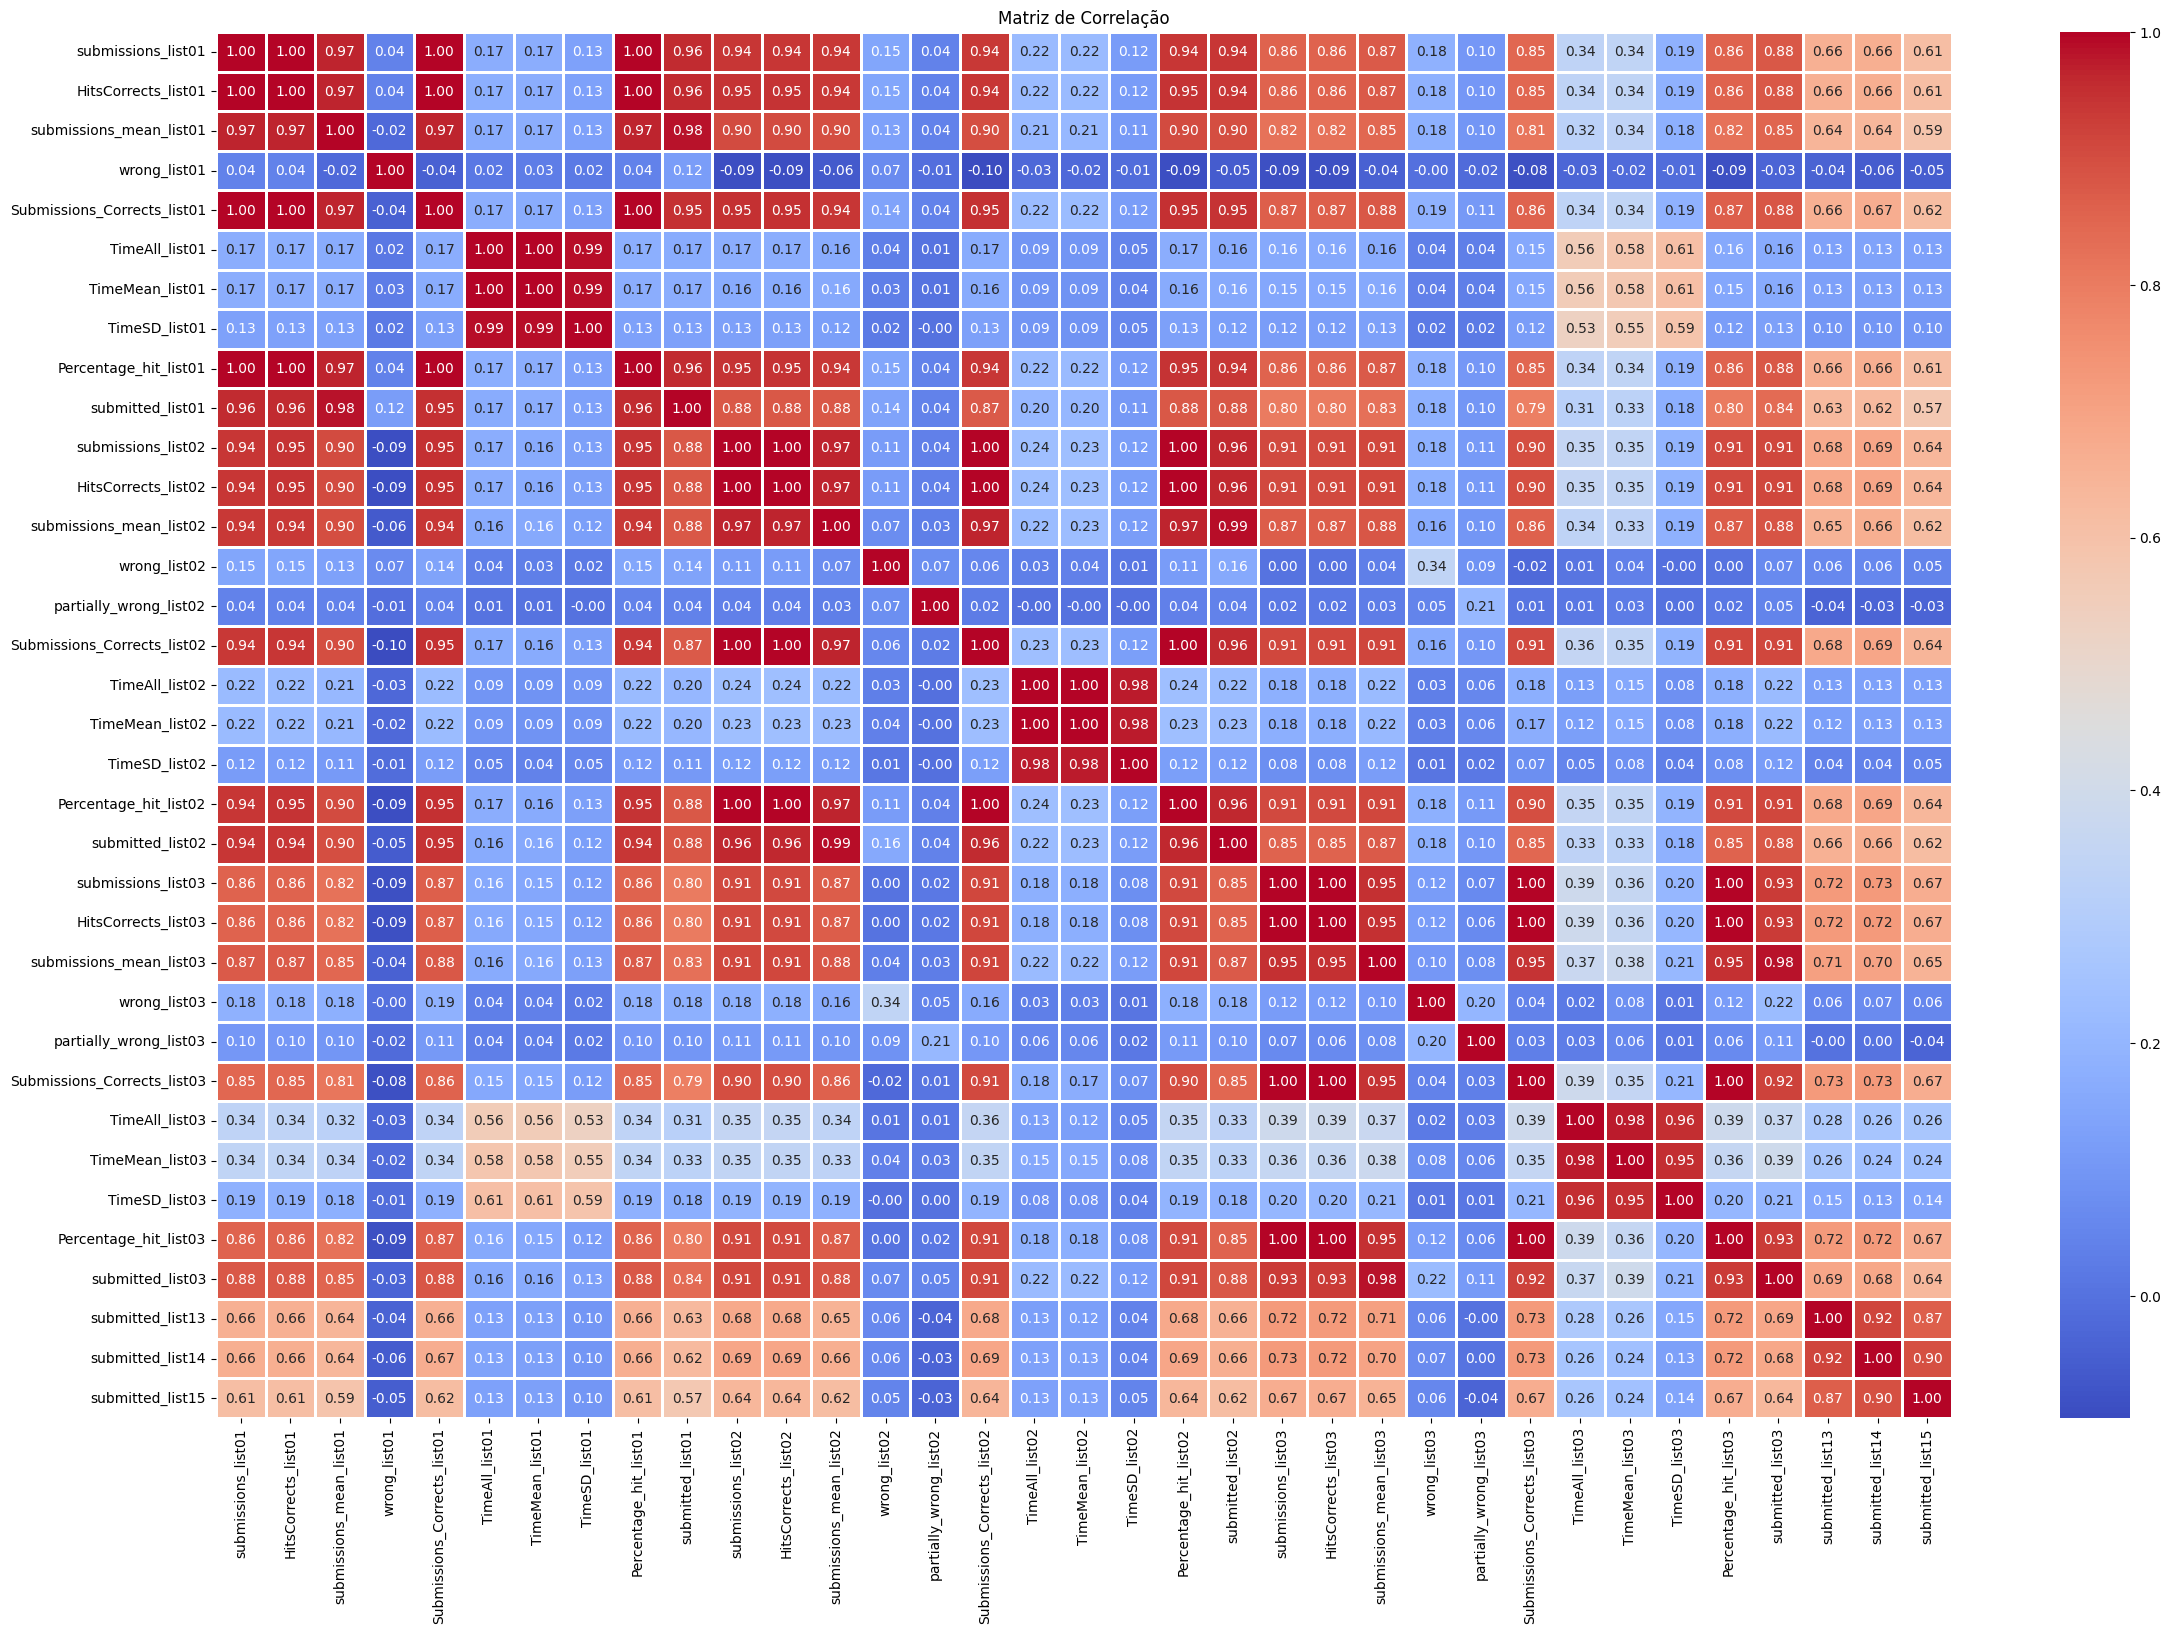

In [319]:
# Faz a matriz de correlação para encontrar os melhores atributos
colunas_retiradas = ['id_user', "QuestionsList_list01", "partially_wrong_list01", "QuestionsList_list02", "QuestionsList_list03"]
datasetcorr = dataset.drop(colunas_retiradas,axis=1)
corr = datasetcorr.corr()
plt.figure(figsize=(28,18))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 1, linecolor = 'white')
plt.title('Matriz de Correlação')
plt.show()

### Clusterização

In [320]:
# Separa os dados em dois datasets: um com os alunos que submeteram a lista 13 e outro com os alunos que não submeteram
colunas_clusterização = ["submissions_list01", "HitsCorrects_list01",	"submissions_mean_list01",	"wrong_list01",	"partially_wrong_list01",	"Submissions_Corrects_list01",	"TimeAll_list01",	"TimeMean_list01", "Percentage_hit_list01",	"submitted_list01",	"submissions_list02", "HitsCorrects_list02",	"submissions_mean_list02",	"wrong_list02",	"partially_wrong_list02",	"Submissions_Corrects_list02",	"TimeAll_list02",	"TimeMean_list02", "Percentage_hit_list02",	"submitted_list02",	"submissions_list03", "HitsCorrects_list03",	"submissions_mean_list03",	"wrong_list03",	"partially_wrong_list03",	"Submissions_Corrects_list03",	"TimeAll_list03",	"TimeMean_list03", "Percentage_hit_list03",	"submitted_list03"]
dataset_1 = dataset[dataset["submitted_list13"] == 1.0].reset_index(drop=True)
dataset_0 = dataset[dataset["submitted_list13"] == 0.0].reset_index(drop=True)

#Separa as colunas que serão utilizadas
X1 = dataset_1.loc[:,colunas_clusterização].values
X0 = dataset_0.loc[:,colunas_clusterização].values

In [321]:
# Normaliza os dados dos alunos que submeteram a lista 13
sc = MinMaxScaler()
sc.fit(X1)
X1 = sc.transform(X1)

In [322]:
# Treina o modelo KMeans para encontrar os clusters
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X1)

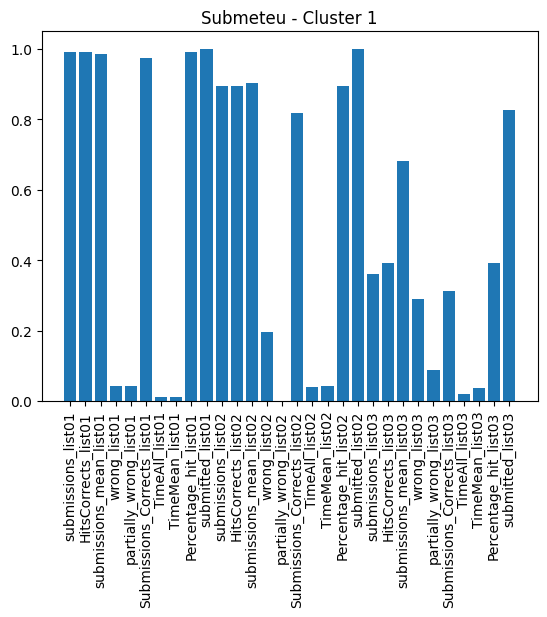

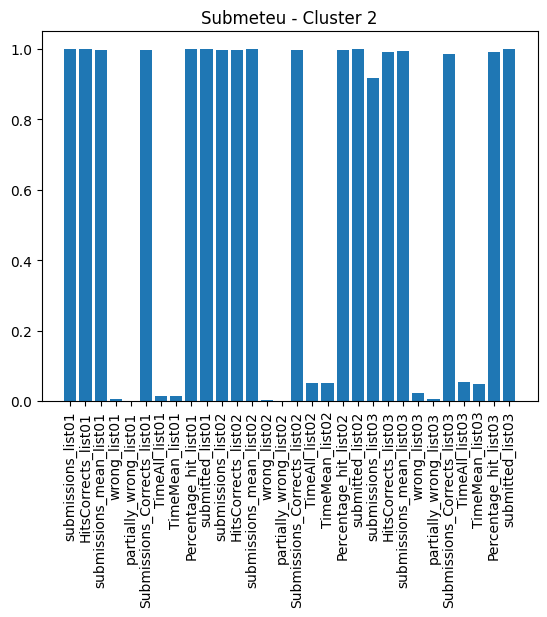

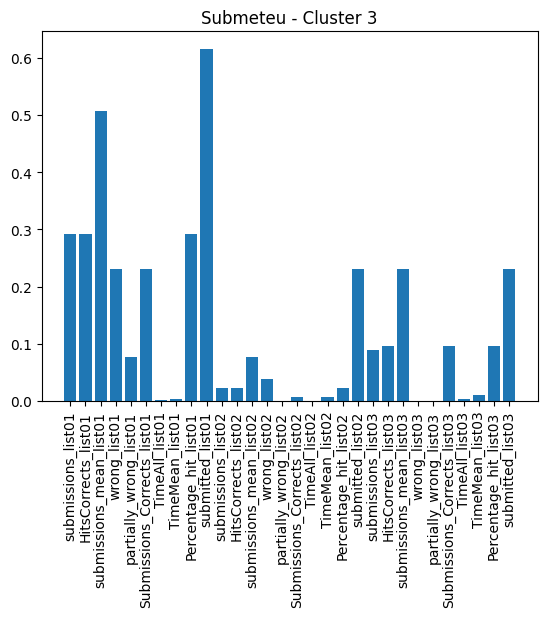

In [323]:
# Visualiza os dados obtidos do treinamento - Alunos que submeteram a lista 13
for i in range (len(kmeans.cluster_centers_)):
  plt.figure()
  plt.title("Submeteu - Cluster " + str(i+1))
  plt.bar(range(len(kmeans.cluster_centers_[i])), kmeans.cluster_centers_[i])
  plt.xticks(range(len(kmeans.cluster_centers_[i])), colunas_clusterização, rotation=90)
  plt.show()

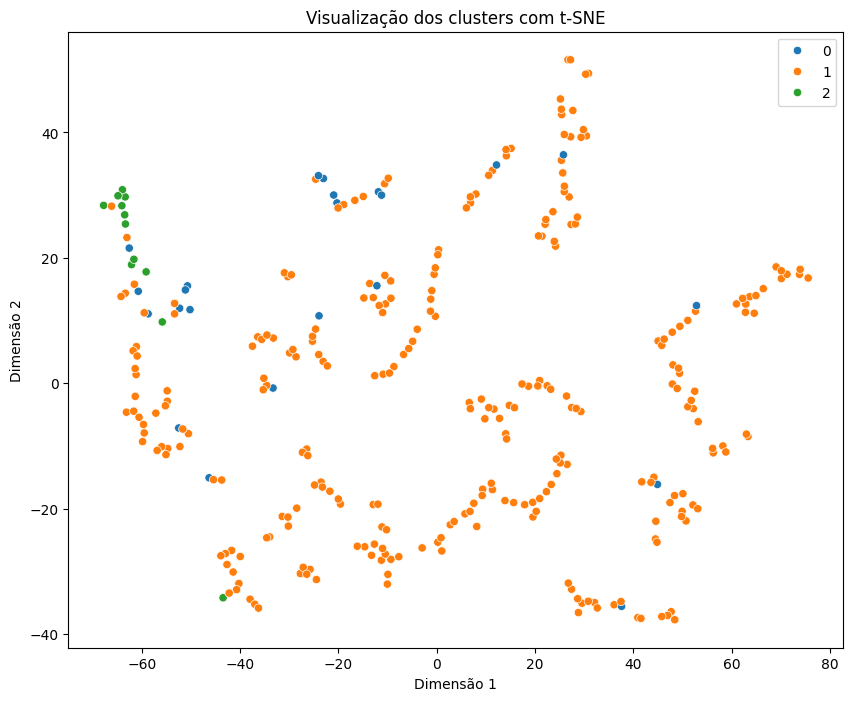

In [324]:
# Cria t-SNE para visualização gráfica dos clusters dos alunos que submeteram a lista 13 em 2 dimensões

data_X = dataset_1[["submissions_list01", "HitsCorrects_list01",	"submissions_mean_list01",	"wrong_list01",	"partially_wrong_list01",	"Submissions_Corrects_list01",	"TimeAll_list01",	"TimeMean_list01", "Percentage_hit_list01",	"submitted_list01",	"submissions_list02", "HitsCorrects_list02",	"submissions_mean_list02",	"wrong_list02",	"partially_wrong_list02",	"Submissions_Corrects_list02",	"TimeAll_list02",	"TimeMean_list02", "Percentage_hit_list02",	"submitted_list02",	"submissions_list03", "HitsCorrects_list03",	"submissions_mean_list03",	"wrong_list03",	"partially_wrong_list03",	"Submissions_Corrects_list03",	"TimeAll_list03",	"TimeMean_list03", "Percentage_hit_list03",	"submitted_list03"]]

# Cria o objeto t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
# Aplica o t-SNE aos dados
X_embedded = tsne.fit_transform(data_X)

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_kmeans, palette="tab10")
plt.title("Visualização dos clusters com t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [325]:
# Normaliza os dados do alunos que não submeteram a lista 13
sc = MinMaxScaler()
sc.fit(X0)
X0 = sc.transform(X0)

In [326]:
# Treina o modelo KMeans para encontrar os clusters
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X0)

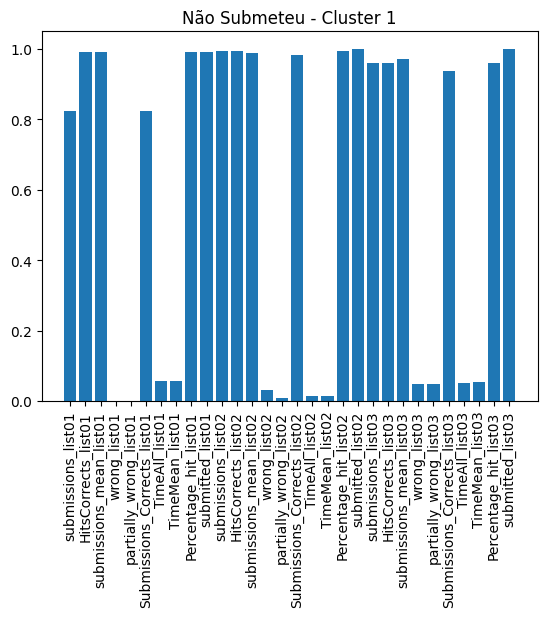

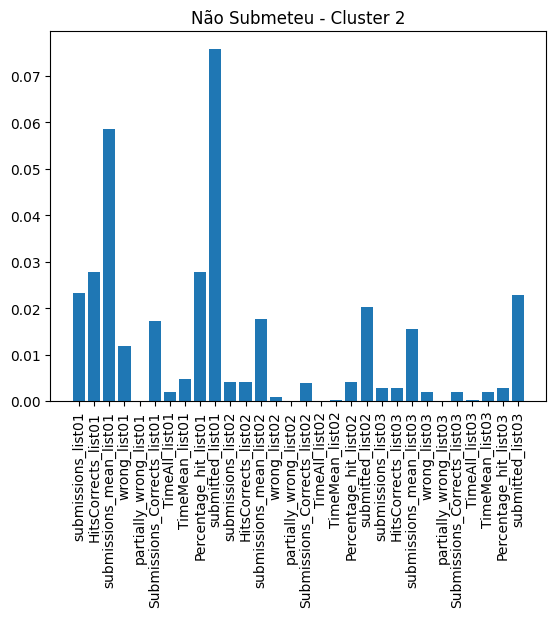

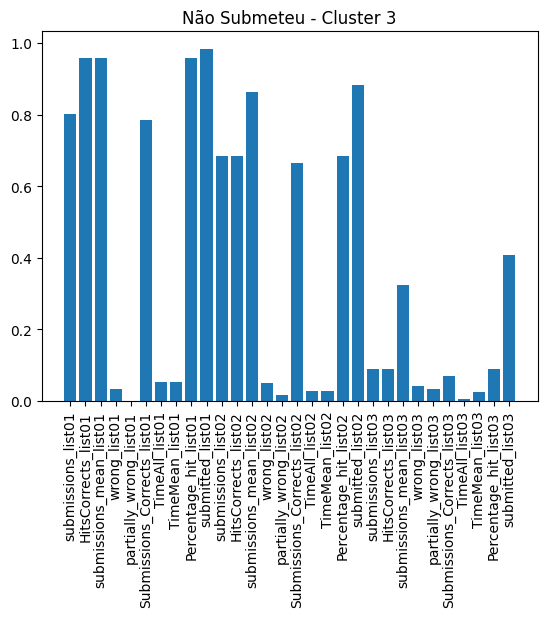

In [327]:
# Visualiza os dados obtidos do treinamento
for i in range (len(kmeans.cluster_centers_)):
  plt.figure()
  plt.title("Não Submeteu - Cluster " + str(i+1))
  plt.bar(range(len(kmeans.cluster_centers_[i])), kmeans.cluster_centers_[i])
  plt.xticks(range(len(kmeans.cluster_centers_[i])), colunas_clusterização, rotation=90)
  plt.show()

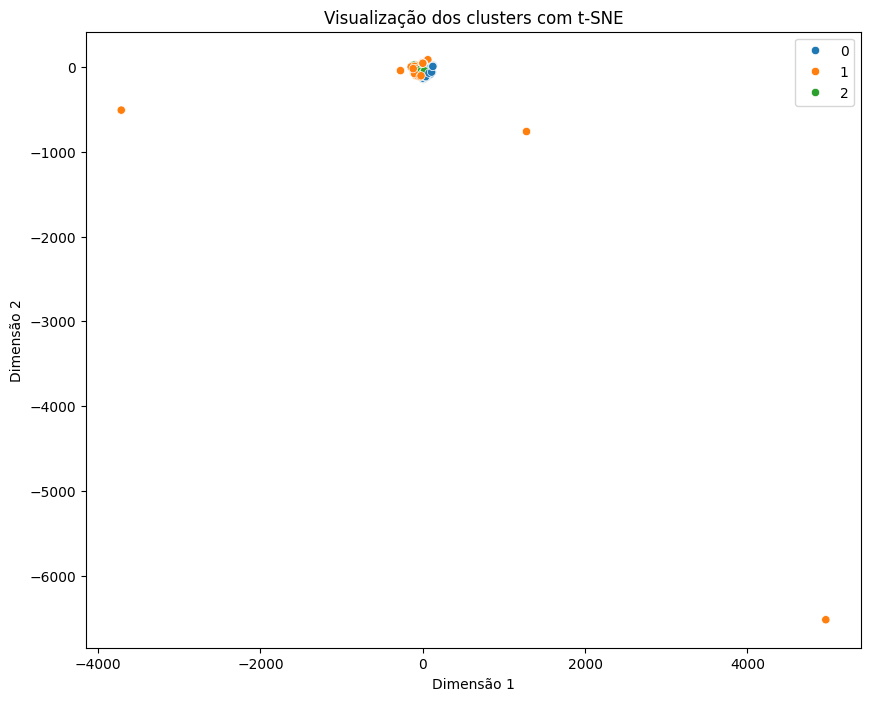

In [328]:
# Cria t-SNE para visualização gráfica dos clusters dos alunos que não submeteram a lista 13 em 2 dimensões

data_X = dataset_0[["submissions_list01", "HitsCorrects_list01",	"submissions_mean_list01",	"wrong_list01",	"partially_wrong_list01",	"Submissions_Corrects_list01",	"TimeAll_list01",	"TimeMean_list01", "Percentage_hit_list01",	"submitted_list01",	"submissions_list02", "HitsCorrects_list02",	"submissions_mean_list02",	"wrong_list02",	"partially_wrong_list02",	"Submissions_Corrects_list02",	"TimeAll_list02",	"TimeMean_list02", "Percentage_hit_list02",	"submitted_list02",	"submissions_list03", "HitsCorrects_list03",	"submissions_mean_list03",	"wrong_list03",	"partially_wrong_list03",	"Submissions_Corrects_list03",	"TimeAll_list03",	"TimeMean_list03", "Percentage_hit_list03",	"submitted_list03"]]

# Criar o objeto TSNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
# Aplicar o t-SNE aos dados
X_embedded = tsne.fit_transform(data_X)

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_kmeans, palette="tab10")
plt.title("Visualização dos clusters com t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

### Processo de Remoção do Outlier

In [329]:
# Guarda o índice original do dataset_0
indices_originais = dataset_0.index.tolist()

# Combina os resultados do t-SNE com os índices originais
tsne_resultados = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'], index=indices_originais)
print(tsne_resultados)

     tsne_feature1  tsne_feature2
0       -28.068352    -100.860718
1       -44.882927     -88.050316
2      -125.617462      19.657757
3        45.998096     -68.058418
4       -74.433640     -79.699402
..             ...            ...
552       1.794733      45.736523
553    -117.151535     -18.150618
554     125.079712       7.708672
555     -31.547689    -110.399544
556     -20.832420    -102.236038

[557 rows x 2 columns]


In [330]:
# Filtra os resultados do t-SNE com base em tsne_feature1 > 4000
tsne_filtrado = tsne_resultados[tsne_resultados['tsne_feature1'] > 4000]
# Mostra os pontos que satisfazem o critério
print(tsne_filtrado)

    tsne_feature1  tsne_feature2
74    4965.956055   -6520.587402


In [331]:
# Remove as linhas do dataset
dataset_0 = dataset_0.drop([74])

In [332]:
# Junta os dois datasets novamente
dataset = pd.concat([dataset_1, dataset_0])

In [333]:
# Descreve o conjunto de dados após a remoção do outlier
dataset.describe()

submissions_list01  QuestionsList_list01  HitsCorrects_list01  \
count          878.000000                 878.0           878.000000   
mean             2.741458                   5.0             2.740319   
std              2.448165                   0.0             2.446880   
min              0.000000                   5.0             0.000000   
25%              0.000000                   5.0             0.000000   
50%              5.000000                   5.0             5.000000   
75%              5.000000                   5.0             5.000000   
max              6.000000                   5.0             5.000000   

       submissions_mean_list01  wrong_list01  partially_wrong_list01  \
count               878.000000    878.000000              878.000000   
mean                 56.435080      0.029613                0.002278   
std                  49.184051      0.211500                0.047700   
min                   0.000000      0.000000                0.000000   
25%                   0.000000      0.000000                0.000000   
50%                 100.000000      0.000000                0.000000   
75%                 100.000000      0.000000                0.000000   
max                 100.000000      3.000000                1.000000   

       Submissions_Corrects_list01  TimeAll_list01  TimeMean_list01  \
count                   878.000000    8.780000e+02     8.780000e+02   
mean                      2.709567    2.464542e+06     5.114036e+05   
std                       2.447846    1.276477e+07     2.558028e+06   
min                       0.000000    0.000000e+00     0.000000e+00   
25%                       0.000000    0.000000e+00     0.000000e+00   
50%                       5.000000    9.329765e+05     2.228487e+05   
75%                       5.000000    2.720502e+06     5.733751e+05   
max                       6.000000    3.614821e+08     7.229642e+07   

       TimeSD_list01  ...  partially_wrong_list03  \
count   8.570000e+02  ...              878.000000   
mean    5.330744e+05  ...                0.012528   
std     3.536785e+06  ...                0.111291   
min     0.000000e+00  ...                0.000000   
25%     0.000000e+00  ...                0.000000   
50%     1.203624e+05  ...                0.000000   
75%     4.392234e+05  ...                0.000000   
max     9.682611e+07  ...                1.000000   

       Submissions_Corrects_list03  TimeAll_list03  TimeMean_list03  \
count                   878.000000    8.780000e+02     8.780000e+02   
mean                      5.345103    5.335848e+06     4.999375e+05   
std                       5.759968    1.443236e+07     1.260817e+06   
min                       0.000000    0.000000e+00     0.000000e+00   
25%                       0.000000    0.000000e+00     0.000000e+00   
50%                       0.500000    6.381700e+04     7.344167e+03   
75%                      12.000000    7.211697e+06     6.629309e+05   
max                      12.000000    2.206111e+08     2.005555e+07   

       TimeSD_list03  Percentage_hit_list03  submitted_list03  \
count   8.610000e+02             878.000000        878.000000   
mean    6.920240e+05              45.396735          0.504556   
std     3.395864e+06              48.302860          0.500264   
min     0.000000e+00               0.000000          0.000000   
25%     0.000000e+00               0.000000          0.000000   
50%     0.000000e+00               8.333333          1.000000   
75%     5.345993e+05             100.000000          1.000000   
max     5.982948e+07             100.000000          1.000000   

       submitted_list13  submitted_list14  submitted_list15  
count        878.000000        878.000000        878.000000  
mean           0.366743          0.346241          0.331435  
std            0.482190          0.476042          0.470997  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.00

### Atribuir Variáveis

In [334]:
# Atribui as colunas que serão utilizadas no treinamento dos classificadores
X = dataset.iloc[:,[1,2,4,7,11,12,13,15,16,19,23,24,25,27,28,31,35,36]].values
y = dataset.iloc[:,37].values

In [335]:
# Separa as variáveis em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print (X_train[0:6])

[[  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  1.   5. 100.   1.  20.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  5.   5. 100.   5. 100.   1.  10.  10. 100.  10. 100.   1.  12.  12.
  100.  12. 100.   1.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]]


### Normalização

In [336]:
# Normaliza os dados de treinamento e teste
sc = MinMaxScaler()
X_trainN = sc.fit_transform(X_train)
X_testN = sc.fit_transform(X_test)

print(X_train[0:6])

[[  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  1.   5. 100.   1.  20.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  5.   5. 100.   5. 100.   1.  10.  10. 100.  10. 100.   1.  12.  12.
  100.  12. 100.   1.]
 [  0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]]


### Treinamento - Modelo SVM

In [337]:
# Treinamento utilizando o modelo de SVM
classifierSVM = SVC(C = 0.1, gamma = 'scale', kernel = 'rbf')
classifierSVM.fit(X_trainN,y_train) # Treinamento com dados da variável de treinamento

SVC(C=0.1)

In [338]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predSVM = classifierSVM.predict(X_testN)

print(y_predSVM[0:20]) #y_predSVM são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0]
[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [339]:
# Cálculo de métricas do modelo SVM

print("Métricas - SVM")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predSVM)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predSVM)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predSVM)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predSVM)*100," %")

Métricas - SVM
Acurácia:  88.63636363636364 %
Precisão: 79.16666666666666  %
Recall: 93.82716049382715  %
F1_score: 85.87570621468926  %


In [340]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predSVM)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[119  20]
 [  5  76]]


### Treinamento - Árvore de Decisão


In [341]:
# Treinamento utilizando o modelo de Árvore de Decisão
classifierDT = tree.DecisionTreeClassifier()
classifierDT.fit(X_train,y_train) # Treinamento com dados da variável de treinamento

DecisionTreeClassifier()

In [342]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predDT = classifierDT.predict(X_test)

print(y_predDT[0:20]) #y_predDT são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0]
[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [343]:
# Cálculo de métricas do modelo Árvore de Decisão

print("Métricas - Árvore de Decisão")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predDT)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predDT)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predDT)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predDT)*100," %")

Métricas - Árvore de Decisão
Acurácia:  85.9090909090909 %
Precisão: 76.04166666666666  %
Recall: 90.12345679012346  %
F1_score: 82.48587570621469  %


In [344]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predDT)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[116  23]
 [  8  73]]


### Treinamento - Random Forest

In [345]:
# Treinamento utilizando o modelo de Random Forest
classifierRF = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 300)
classifierRF.fit(X_train, y_train) # Treinamento com dados da variável de treinamento

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [346]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predRF = classifierRF.predict(X_test)

print(y_predRF[0:20]) #y_predRF são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0]
[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [347]:
# Cálculo de métricas do modelo Random Forest

print("Métricas - Random Forest")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predRF)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predRF)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predRF)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predRF)*100," %")

Métricas - Random Forest
Acurácia:  88.63636363636364 %
Precisão: 79.16666666666666  %
Recall: 93.82716049382715  %
F1_score: 85.87570621468926  %


In [348]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[119  20]
 [  5  76]]


### Treinamento - Naive Bayes

In [349]:
# Treinamento utilizando o modelo de Gaussian Naive Bayes
classifierNB = GaussianNB()
classifierNB.fit(X_trainN, y_train) # Treinamento com dados da variável de treinamento

GaussianNB()

In [350]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predNB = classifierNB.predict(X_testN)

print(y_predNB[0:20]) #y_predNB são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0]
[0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [351]:
# Cálculo de métricas do modelo Naive Bayes

print("Métricas - Naive Bayes")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predNB)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predNB)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predNB)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predNB)*100," %")

Métricas - Naive Bayes
Acurácia:  86.36363636363636 %
Precisão: 75.24752475247524  %
Recall: 93.82716049382715  %
F1_score: 83.51648351648352  %


In [352]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predNB)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[114  25]
 [  5  76]]


## Conjunto de Dados 2
- Conjunto de dados formado pelos alunos de todas as turmas de Lógica de Programação nos anos de 2022 e 2023.

### Carregando os dados

In [363]:
# Faz o upload do conjunto de dados
dataset2 = pd.read_csv('ConjuntoDeDados2.csv')

In [364]:
# Retira linhas com valores nulos
dataset2 = dataset2.dropna(axis=0)

# Nova coluna que verifica se o aluno submeteu a lista 13, 14 ou 15
dataset2['submitted_list13/14/15'] = dataset2.apply(
    lambda row: 0 if (row['submitted_list_final01'] == 0 and row['submitted_list_final02'] == 0 and row['submitted_list_final03'] == 0) else 1,
    axis=1
)

In [365]:
# Descreve o conjunto de dados
dataset2.describe()

submissions_list01  QuestionsList_list01  HitsCorrects_list01  \
count         1707.000000                1707.0          1707.000000   
mean            27.233743                   5.0             4.257762   
std             28.144304                   0.0             1.679227   
min              0.000000                   5.0             0.000000   
25%             10.000000                   5.0             5.000000   
50%             20.000000                   5.0             5.000000   
75%             36.000000                   5.0             5.000000   
max            236.000000                   5.0             5.000000   

       submissions_mean_list01  wrong_list01  partially_wrong_list01  \
count              1707.000000   1707.000000             1707.000000   
mean                 32.594827     18.448155                0.851201   
std                  24.575648     23.231116                2.653296   
min                   0.000000      0.000000                0.000000   
25%                  14.705882      4.000000                0.000000   
50%                  27.777778     11.000000                0.000000   
75%                  46.153846     25.000000                0.000000   
max                 100.000000    231.000000               39.000000   

       Submissions_Corrects_list01  TimeAll_list01  TimeMean_list01  \
count                  1707.000000    1.707000e+03     1.707000e+03   
mean                      5.732865    5.724898e+07     9.045945e+05   
std                       3.479481    5.547463e+08     4.934696e+06   
min                       0.000000   -1.852866e+08    -3.088109e+06   
25%                       5.000000    2.465674e+06     2.117622e+05   
50%                       5.000000    8.242187e+06     4.168249e+05   
75%                       7.000000    2.470353e+07     7.910616e+05   
max                      40.000000    1.894460e+10     1.552836e+08   

       TimeSD_list01  ...  Percentage_hit_list03  sum_char_by_list03  \
count   1.707000e+03  ...            1707.000000         1707.000000   
mean    9.612640e+05  ...              69.844757        14175.967194   
std     8.915550e+06  ...              42.795726        26047.686978   
min     0.000000e+00  ...               0.000000            0.000000   
25%     1.206965e+05  ...              16.666667           89.000000   
50%     2.695470e+05  ...             100.000000         6546.000000   
75%     6.016290e+05  ...             100.000000        16328.000000   
max     2.583030e+08  ...             100.000000       352999.000000   

       mean_char_by_list03  std_char_by_list03  len_answer03  \
count          1707.000000         1707.000000   1707.000000   
mean            184.675222          107.485573   6496.492677   
std             164.357612          119.126744   7315.038455   
min               0.000000            0.000000      0.000000   
25%               7.866667            4.598419   1537.500000   
50%             183.843750           89.219783   4854.000000   
75%             265.377033          145.506375   8918.000000   
max            1569.589189         1567.979389  76317.000000   

       submitted_list03  submitted_list_final01  submitted_list_final02  \
count       1707.000000             1707.000000             1707.000000   
mean           0.788518                0.585237                0.554189   
std            0.408479                0.492825                0.497201   
min            0.000000                0.000000                0.000000   
25%            1.000000                0.000000                0.000000   
50%            1.000000                1.000000                1.000000   
75%            1.000000                1.000000                1.000000   
max            1.000000                1.000000                1.000000   

       submitted_list_final03  submitted_list13/14/15  
count             1707.000000             1707.000000  
mean                 0.524312                0.594610  

### Visualização da Matriz de Correlação

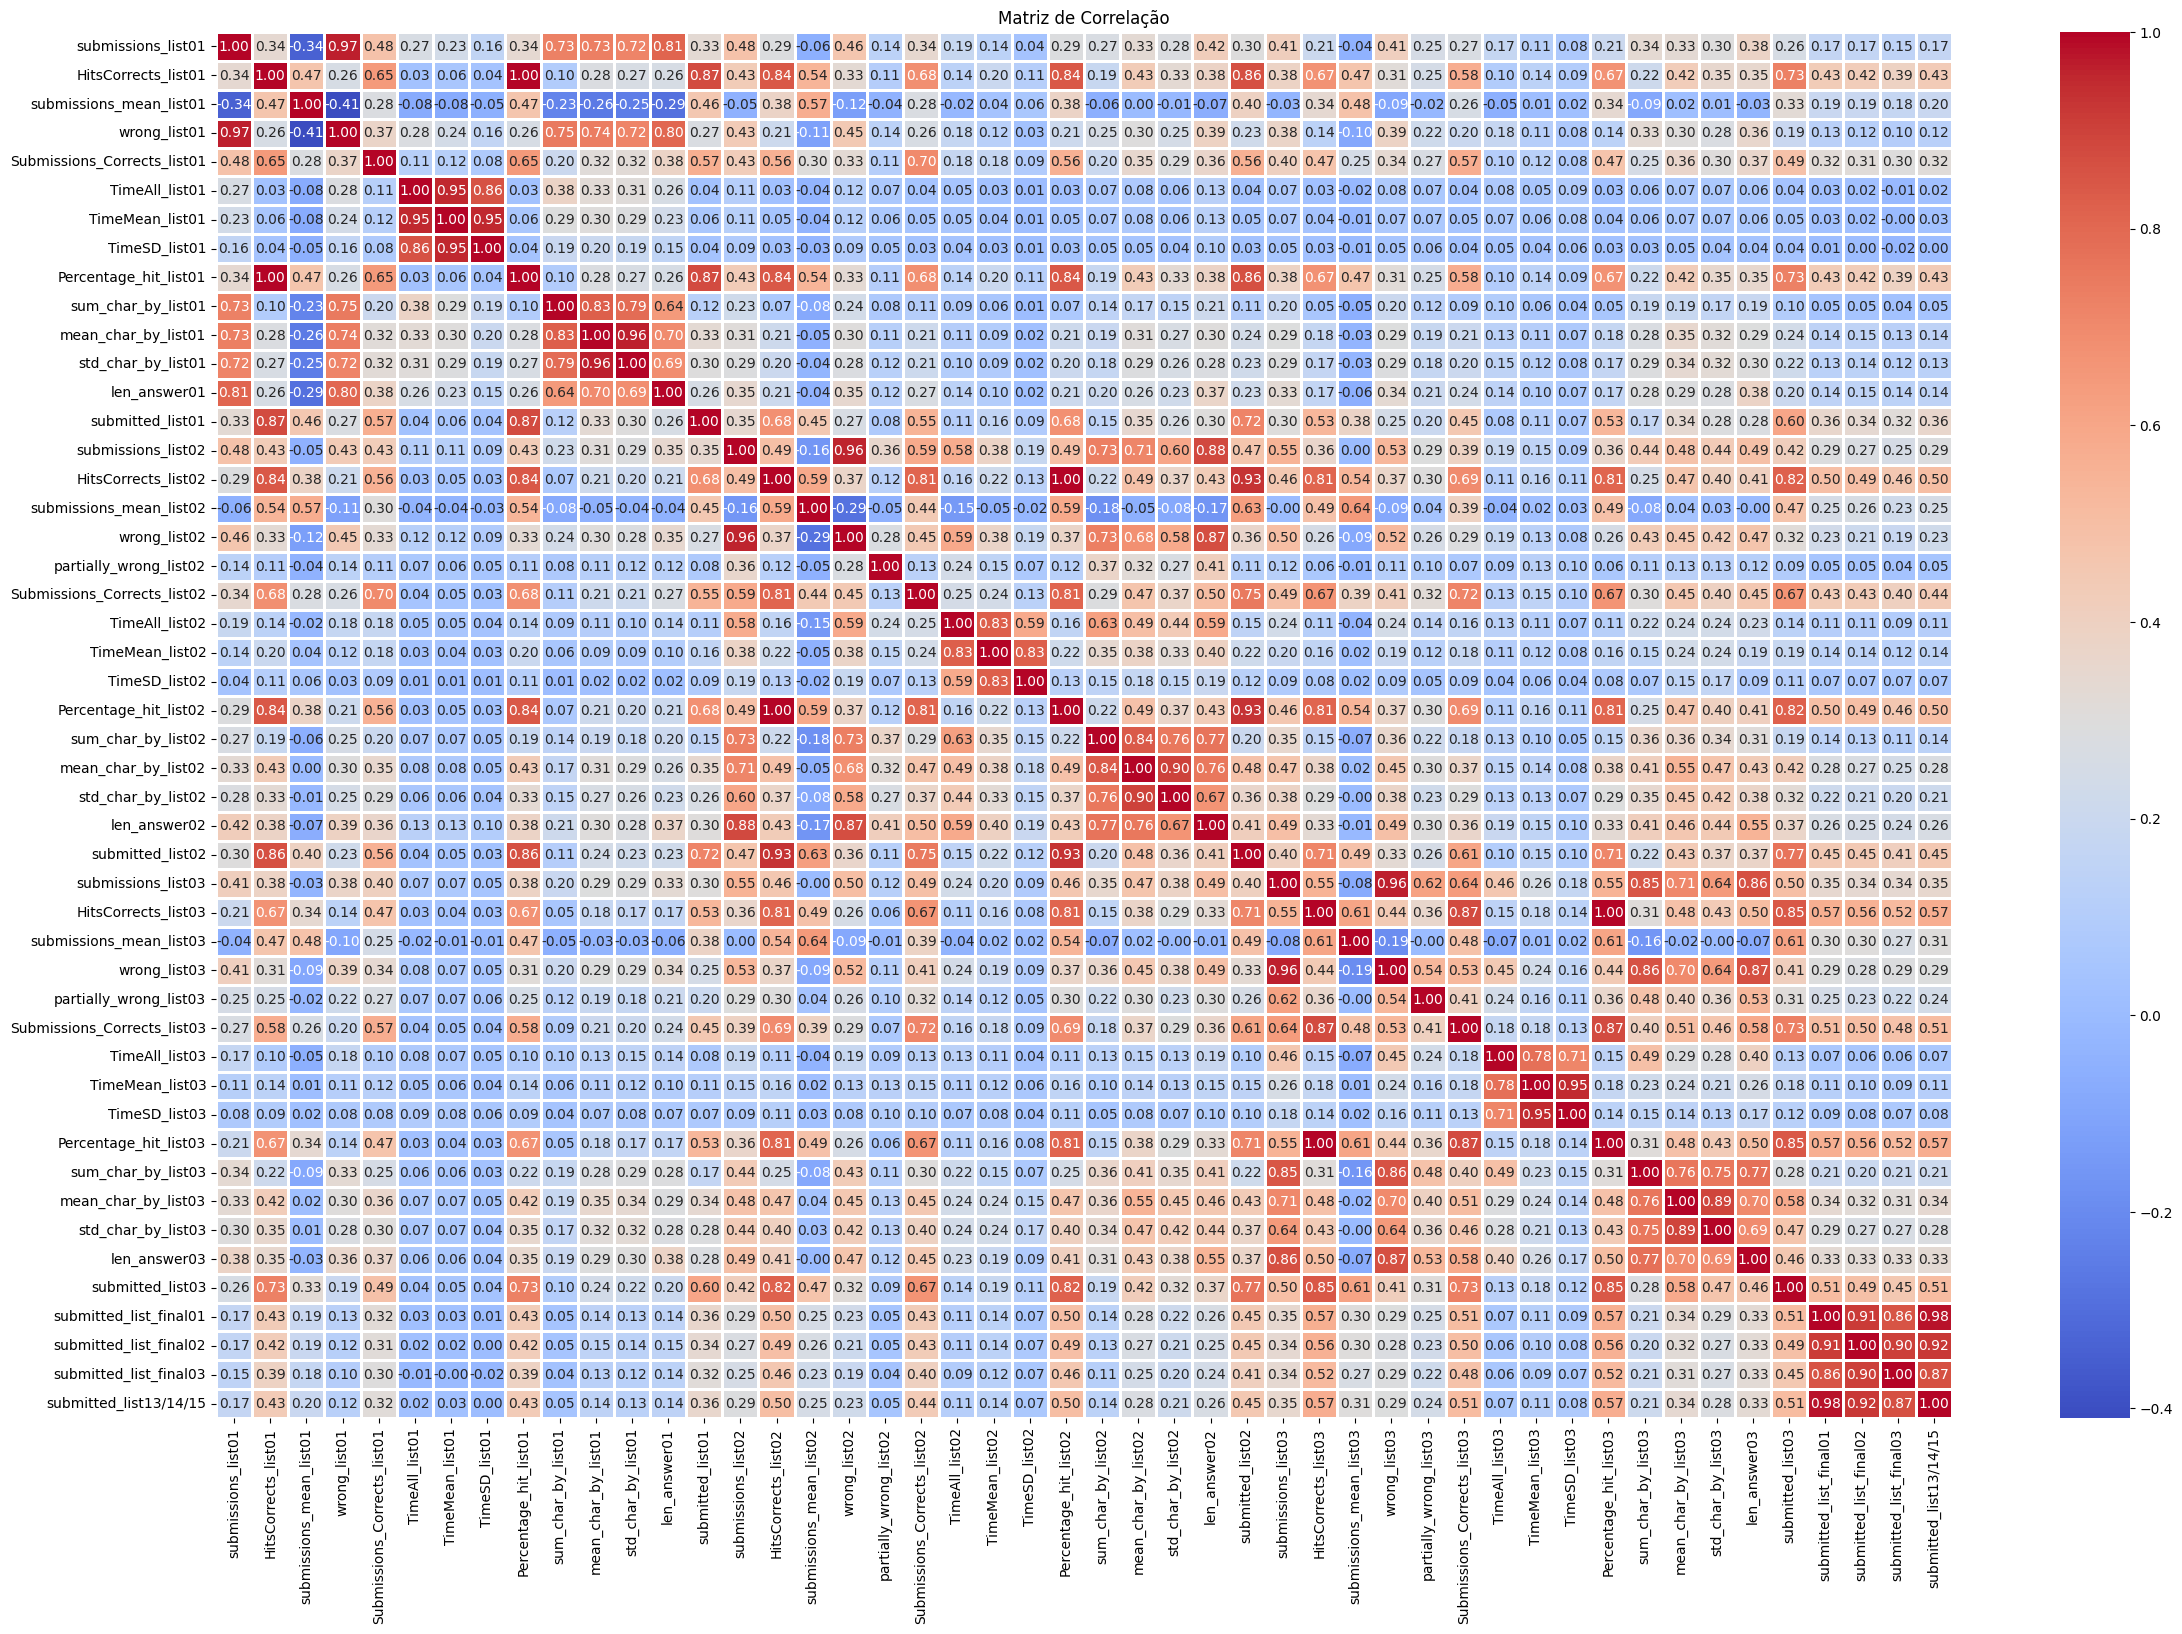

In [392]:
# Faz a matriz de correlação para encontrar os melhores atributos
colunas_retiradas = ['id_user', "QuestionsList_list01", "partially_wrong_list01", "QuestionsList_list02", "QuestionsList_list03"]
datasetcorr = dataset2.drop(colunas_retiradas,axis=1)
corr = datasetcorr.corr()
plt.figure(figsize=(28,18))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 1, linecolor = 'white')
plt.title('Matriz de Correlação')
plt.show()

### Atribuir Variáveis

In [369]:
# Atribui as colunas que serão utilizadas no treinamento dos classificadores
X = dataset2.iloc[:,[24,30,39,44]].values #Melhores atributos de acordo com a árvore de decisão
y = dataset2.iloc[:,52].values

In [370]:
# Separa as variáveis em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print (X_train[0:6])

[[3.05727370e+07 1.43102966e+02 1.70000000e+01 1.61470000e+04]
 [8.43182100e+06 7.02239987e+01 1.20000000e+01 1.65300000e+03]
 [4.60081530e+07 1.47399436e+02 1.30000000e+01 4.12510000e+04]
 [3.08567100e+06 4.34291926e+01 1.20000000e+01 8.68900000e+03]
 [5.82212700e+07 1.20099431e+02 2.60000000e+01 3.20870000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


### Normalização

In [371]:
# Normaliza os dados de treinamento e teste
sc = MinMaxScaler()
X_trainN = sc.fit_transform(X_train)
X_testN = sc.fit_transform(X_test)

print(X_train[0:6])

[[3.05727370e+07 1.43102966e+02 1.70000000e+01 1.61470000e+04]
 [8.43182100e+06 7.02239987e+01 1.20000000e+01 1.65300000e+03]
 [4.60081530e+07 1.47399436e+02 1.30000000e+01 4.12510000e+04]
 [3.08567100e+06 4.34291926e+01 1.20000000e+01 8.68900000e+03]
 [5.82212700e+07 1.20099431e+02 2.60000000e+01 3.20870000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


### Treinamento - Modelo SVM

In [372]:
# Treinamento utilizando o modelo de SVM
classifierSVM = SVC(C = 100, gamma = 'scale', kernel = 'linear')
classifierSVM.fit(X_trainN,y_train) # Treinamento com dados da variável de treinamento

SVC(C=100, kernel='linear')

In [373]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predSVM = classifierSVM.predict(X_testN)

print(y_predSVM[0:20]) #y_predSVM são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
[0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1]


In [374]:
# Cálculo de métricas do modelo SVM

print("Métricas - SVM")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predSVM)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predSVM)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predSVM)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predSVM)*100," %")

Métricas - SVM
Acurácia:  77.28337236533957 %
Precisão: 73.84105960264901  %
Recall: 92.5311203319502  %
F1_score: 82.13627992633518  %


In [375]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predSVM)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[107  79]
 [ 18 223]]


### Treinamento - Árvore de Decisão


In [376]:
# Treinamento utilizando o modelo de Árvore de Decisão
classifierDT = tree.DecisionTreeClassifier()
classifierDT.fit(X_train,y_train) # Treinamento com dados da variável de treinamento

DecisionTreeClassifier()

In [377]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predDT = classifierDT.predict(X_test)

print(y_predDT[0:20]) #y_predDT são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
[0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1]


In [378]:
# Cálculo de métricas do modelo Árvore de Decisão

print("Métricas - Árvore de Decisão")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predDT)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predDT)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predDT)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predDT)*100," %")

Métricas - Árvore de Decisão
Acurácia:  71.42857142857143 %
Precisão: 76.2114537444934  %
Recall: 71.78423236514523  %
F1_score: 73.93162393162393  %


In [379]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predDT)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[132  54]
 [ 68 173]]


### Treinamento - Random Forest

In [380]:
# Treinamento utilizando o modelo de Random Forest
classifierRF = RandomForestClassifier(bootstrap = True, max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 300)
classifierRF.fit(X_train, y_train) # Treinamento com dados da variável de treinamento

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300)

In [381]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predRF = classifierRF.predict(X_test)

print(y_predRF[0:20]) #y_predRF são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
[0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1]


In [382]:
# Cálculo de métricas do modelo Random Forest

print("Métricas - Random Forest")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predRF)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predRF)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predRF)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predRF)*100," %")

Métricas - Random Forest
Acurácia:  78.68852459016394 %
Precisão: 75.68493150684932  %
Recall: 91.70124481327801  %
F1_score: 82.92682926829268  %


In [383]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[115  71]
 [ 20 221]]


### Treinamento - Naive Bayes

In [384]:
# Treinamento utilizando o modelo de Gaussian Naive Bayes
classifierNB = GaussianNB()
classifierNB.fit(X_trainN, y_train) # Treinamento com dados da variável de treinamento

GaussianNB()

In [385]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predNB = classifierNB.predict(X_testN)

print(y_predNB[0:20]) #y_predNB são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
[0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1]


In [386]:
# Cálculo de métricas do modelo Naive Bayes

print("Métricas - Naive Bayes")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predNB)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predNB)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predNB)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predNB)*100," %")

Métricas - Naive Bayes
Acurácia:  76.81498829039812 %
Precisão: 73.05194805194806  %
Recall: 93.3609958506224  %
F1_score: 81.9672131147541  %


In [387]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predNB)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[103  83]
 [ 16 225]]


## Conjunto de Dados 3
- Conjunto de dados composto apenas pelos alunos das turmas de um dos professores de Lógica de Programação da instituição, nos anos de 2022 e 2023.

### Carregando os dados

In [388]:
# Faz o upload do conjunto de dados
dataset3 = pd.read_csv('ConjuntoDeDados3.csv')

In [389]:
# Retira linhas com valores nulos
dataset3 = dataset3.dropna(axis=0)

# Nova coluna que verifica se o aluno submeteu a lista 13, 14 ou 15
dataset3['submitted_list13/14/15'] = dataset3.apply(
    lambda row: 0 if (row['submitted_list_final01'] == 0 and row['submitted_list_final02'] == 0 and row['submitted_list_final03'] == 0) else 1,
    axis=1
)

In [390]:
# Descreve o conjunto de dados
dataset3.describe()

submissions_list01  QuestionsList_list01  HitsCorrects_list01  \
count          277.000000                 277.0           277.000000   
mean            24.111913                   5.0             4.541516   
std             22.166002                   0.0             1.346994   
min              0.000000                   5.0             0.000000   
25%             11.000000                   5.0             5.000000   
50%             19.000000                   5.0             5.000000   
75%             30.000000                   5.0             5.000000   
max            206.000000                   5.0             5.000000   

       submissions_mean_list01  wrong_list01  partially_wrong_list01  \
count               277.000000    277.000000              277.000000   
mean                 36.402503     15.559567                0.700361   
std                  22.513750     17.282422                2.030680   
min                   0.000000      0.000000                0.000000   
25%                  20.689655      4.000000                0.000000   
50%                  33.333333     11.000000                0.000000   
75%                  50.000000     22.000000                0.000000   
max                 100.000000    135.000000               14.000000   

       Submissions_Corrects_list01  TimeAll_list01  TimeMean_list01  \
count                   277.000000    2.770000e+02     2.770000e+02   
mean                      6.093863    1.256293e+08     1.366212e+06   
std                       3.261301    1.285823e+09     1.017391e+07   
min                       0.000000    0.000000e+00     0.000000e+00   
25%                       5.000000    3.019794e+06     2.605408e+05   
50%                       6.000000    8.025840e+06     4.028153e+05   
75%                       7.000000    1.647155e+07     6.257838e+05   
max                      24.000000    1.894460e+10     1.552836e+08   

       TimeSD_list01  ...  TimeSD_list03  Percentage_hit_list03  \
count   2.770000e+02  ...   2.770000e+02             277.000000   
mean    1.645013e+06  ...   1.389509e+06              75.872443   
std     1.534915e+07  ...   7.076078e+06              39.336933   
min     0.000000e+00  ...   0.000000e+00               0.000000   
25%     1.480201e+05  ...   1.481231e+05              58.333333   
50%     2.658915e+05  ...   3.649215e+05             100.000000   
75%     4.860630e+05  ...   6.646686e+05             100.000000   
max     2.378382e+08  ...   1.027610e+08             100.000000   

       sum_char_by_list03  mean_char_by_list03  std_char_by_list03  \
count          277.000000           277.000000          277.000000   
mean         14428.368231           209.165833          123.434317   
std          19241.614470           171.363055          135.752232   
min              0.000000             0.000000            0.000000   
25%           1918.000000            83.391304           56.356262   
50%           7924.000000           195.146341           97.550590   
75%          19511.000000           290.709677          148.199822   
max         147877.000000           930.260870         1216.469310   

       submitted_list03  submitted_list_final01  submitted_list_final02  \
count        277.000000              277.000000              277.000000   
mean           0.841155                0.671480                0.617329   
std            0.366193                0.470525                0.486919   
min            0.000000                0.000000                0.000000   
25%            1.000000                0.000000                0.000000   
50%            1.000000                1.000000                1.000000   
75%            1.000000                1.000000                1.000000   
max            1.000000                1.000000                1.000000   

       submitted_list_final03  submitted_list13/14/15  
count              277.000000              277.000000  
mean                 0.599278                0

### Visualização da Matriz de Correlação

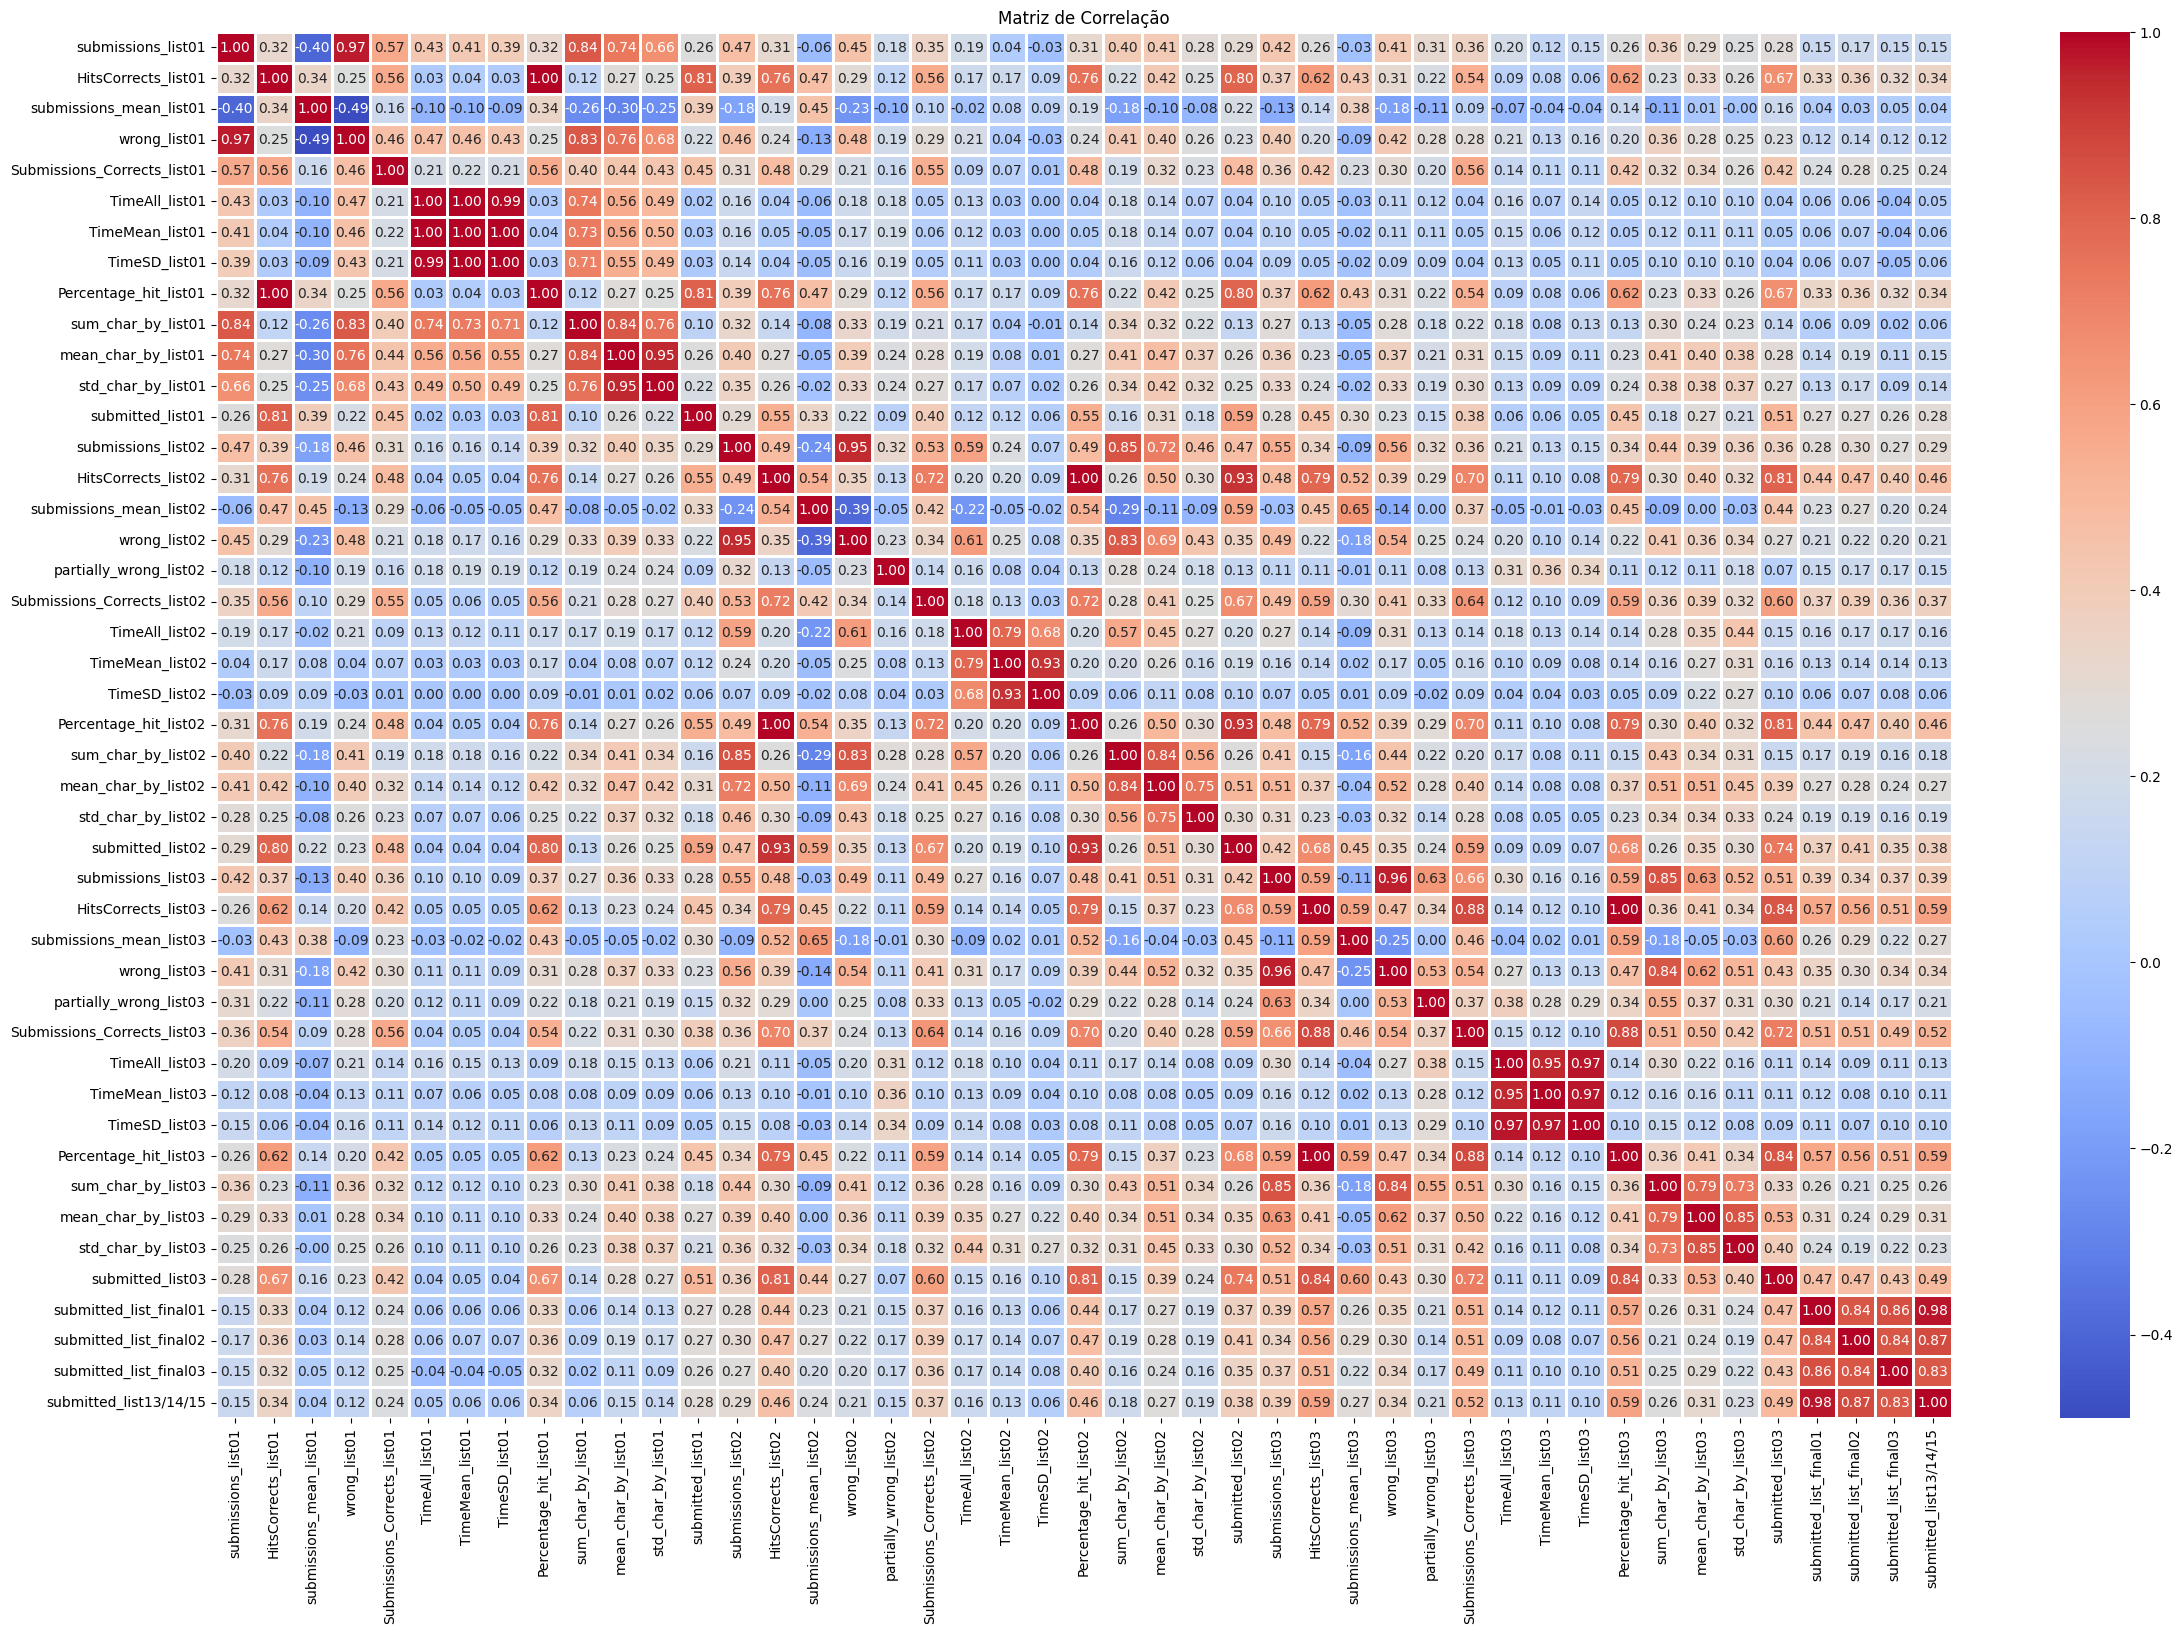

In [391]:
# Faz a matriz de correlação para encontrar os melhores atributos
colunas_retiradas = ['id_user', "QuestionsList_list01", "partially_wrong_list01", "QuestionsList_list02", "QuestionsList_list03"]
datasetcorr = dataset3.drop(colunas_retiradas,axis=1)
corr = datasetcorr.corr()
plt.figure(figsize=(28,18))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 1, linecolor = 'white')
plt.title('Matriz de Correlação')
plt.show()

### Atribuir Variáveis

In [395]:
# Atribui as colunas que serão utilizadas no treinamento dos classificadores
X = dataset3.iloc[:,[18,26,30,33,37,42,45]].values #Atributos com maior correlação
y = dataset3.iloc[:,49].values

In [396]:
# Separa as variáveis em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print (X_train[0:6])

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.4000e+01 1.1805e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.7000e+01 2.0878e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.2000e+01 1.1749e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.3000e+01 1.5136e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.9000e+01 2.0835e+04
  1.0000e+00]]


### Normalização

In [397]:
# Normaliza os dados de treinamento e teste
sc = MinMaxScaler()
X_trainN = sc.fit_transform(X_train)
X_testN = sc.fit_transform(X_test)

print(X_train[0:6])

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.4000e+01 1.1805e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.7000e+01 2.0878e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.2000e+01 1.1749e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.3000e+01 1.5136e+04
  1.0000e+00]
 [1.0000e+01 1.0000e+02 1.0000e+00 1.2000e+01 1.9000e+01 2.0835e+04
  1.0000e+00]]


### Treinamento - Modelo SVM

In [398]:
# Treinamento utilizando o modelo de SVM
classifierSVM = SVC(C = 100, gamma = 'scale', kernel = 'linear')
classifierSVM.fit(X_trainN,y_train) # Treinamento com dados da variável de treinamento

SVC(C=100, kernel='linear')

In [399]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predSVM = classifierSVM.predict(X_testN)

print(y_predSVM[0:20]) #y_predSVM são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [400]:
# Cálculo de métricas do modelo SVM

print("Métricas - SVM")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predSVM)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predSVM)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predSVM)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predSVM)*100," %")

Métricas - SVM
Acurácia:  88.57142857142857 %
Precisão: 90.56603773584906  %
Recall: 94.11764705882352  %
F1_score: 92.3076923076923  %


In [402]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predSVM)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[14  5]
 [ 3 48]]


### Treinamento - Árvore de Decisão


In [403]:
# Treinamento utilizando o modelo de Árvore de Decisão
classifierDT = tree.DecisionTreeClassifier()
classifierDT.fit(X_train,y_train) # Treinamento com dados da variável de treinamento

DecisionTreeClassifier()

In [404]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predDT = classifierDT.predict(X_test)

print(y_predDT[0:20]) #y_predDT são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [405]:
# Cálculo de métricas do modelo Árvore de Decisão

print("Métricas - Árvore de Decisão")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predDT)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predDT)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predDT)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predDT)*100," %")

Métricas - Árvore de Decisão
Acurácia:  78.57142857142857 %
Precisão: 86.0  %
Recall: 84.31372549019608  %
F1_score: 85.14851485148515  %


In [406]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predDT)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[12  7]
 [ 8 43]]


### Treinamento - Random Forest

In [407]:
# Treinamento utilizando o modelo de Random Forest
classifierRF = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100)
classifierRF.fit(X_train, y_train) # Treinamento com dados da variável de treinamento

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [408]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predRF = classifierRF.predict(X_test)

print(y_predRF[0:20]) #y_predRF são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [409]:
# Cálculo de métricas do modelo Random Forest

print("Métricas - Random Forest")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predRF)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predRF)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predRF)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predRF)*100," %")

Métricas - Random Forest
Acurácia:  87.14285714285714 %
Precisão: 88.88888888888889  %
Recall: 94.11764705882352  %
F1_score: 91.42857142857143  %


In [410]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[13  6]
 [ 3 48]]


### Treinamento - Naive Bayes

In [411]:
# Treinamento utilizando o modelo de Gaussian Naive Bayes
classifierNB = GaussianNB()
classifierNB.fit(X_trainN, y_train) # Treinamento com dados da variável de treinamento

GaussianNB()

In [412]:
# Validação - Prever y_test a partir do que foi aprendido no treinamento
y_predNB = classifierNB.predict(X_testN)

print(y_predNB[0:20]) #y_predNB são as previsões do modelo
print(y_test[0:20]) #y_test são os valores reais

[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [413]:
# Cálculo de métricas do modelo Naive Bayes

print("Métricas - Naive Bayes")
# Calcula a acurácia
print("Acurácia: ", accuracy_score(y_test,y_predNB)*100,"%")

# Calcula a precisão
print("Precisão:", precision_score(y_test,y_predNB)*100," %")

# Calcula o recall
print("Recall:", recall_score(y_test,y_predNB)*100," %")

# Calcula da precisão
print("F1_score:", f1_score(y_test,y_predNB)*100," %")

Métricas - Naive Bayes
Acurácia:  85.71428571428571 %
Precisão: 87.27272727272727  %
Recall: 94.11764705882352  %
F1_score: 90.56603773584906  %


In [414]:
# Mostra a matriz de confusão
cm = confusion_matrix(y_test, y_predNB)
print("Matriz de confusão: ")
print(cm)

Matriz de confusão: 
[[12  7]
 [ 3 48]]
